## Introduction

Lending Club is the world's largest peer-to-peer lending platform. This project will perform analyzing and modeling on Lending Club loan data. The objective is to identify the potential risk factors associate with a loan default so the investors can utilize this knowledge to improve portfolio risk management.

The analysis will go through the following steps:
    1. Preliminary data wrangling
    2. Exploratory data analysis
    3. Data cleaning for moeling
    4. Build, tune and evaluate a model

## I. Getting Started

### Import Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm 
from datetime import datetime

### Load the dataset

In [2]:
df = pd.read_csv('loan.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [62]:
df.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,2260668,2260668,2260668,2093699,2113761,2260668,2260668,2260668,2260668,2260668,...,10613,10613,10613,10613,10613,2260668,2260668,33056,33056,33056
unique,2,7,35,512694,11,6,3,139,9,2,...,3,26,27,26,5,2,2,82,3,89
top,36 months,B,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Fully Paid,n,...,COMPLETED,Sep-2017,Dec-2017,Sep-2017,Late (16-30 days),Cash,N,Feb-2019,ACTIVE,Jan-2019
freq,1609754,663557,145903,38824,748005,1111450,886231,61992,1041952,2259986,...,7541,2444,1756,1715,4622,2182546,2227612,2730,14811,1725


#### Data overview:
1. The dataset contains data for all loans issued through 2008-2018    in the United States.
2. There are 2,260,668 observations and 145 variables.
3. The size of this dataset is about 2.4 GB.
4. There are columns that contain null values.

### Preliminary data wrangling

1. Target variable is Loan Status
The aim of this analysis is to identify patterns which indicate if a loan is default so the target variable is loan_status. Let's first check the categories of Loan Status:

In [7]:
#Categories of Loan Status
df['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

#### 1.1 Choose major categories
Since the aim is to detect the risk factors that caurse a loan to default, all "Current" loan is not helpful. Also we will only focus on two major categories "Fully Paid" (good loans) and "Charged Off" (bad loans) and ignore all other minor categories.

In [8]:
#Filter only "Fully Paid" and "Charged Off" loans:
df1 = df[df['loan_status'].isin(["Fully Paid", "Charged Off"])]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303607 entries, 100 to 2260664
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 1.4+ GB


#### 1.2 Create a binary column of "charge_off"
We need to convert loan status from categorical to numeric variables for our analysis.

In [9]:
#Add column of "Charge Off (1 or 0)"
df1['charge_off'] = df1['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
pd.crosstab(df1.loan_status, df1.charge_off, margins=True, margins_name="Total")

/Users/host1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


charge_off,0,1,Total
loan_status,,,
Charged Off,0,261655,261655
Fully Paid,1041952,0,1041952
Total,1041952,261655,1303607


#### 2. Remove redundant variables

In [10]:
#Get the column names
df1.columns.tolist()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

Among 145 variables, there are many not helpful for our analysis so we need to remove them.

2.1 Customer Behavior variables:

In [11]:
#Remove below consumer behaviour columns
df1.drop(['last_pymnt_d',
'last_pymnt_amnt',
'last_credit_pull_d',
'earliest_cr_line',
'open_acc',
'pub_rec',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'revol_bal',
'revol_util',
'total_acc',
'out_prncp',
'out_prncp_inv',
'recoveries',
'collection_recovery_fee',
'hardship_flag',
'disbursement_method',
'debt_settlement_flag',
'pymnt_plan'],axis=1,inplace=True)

/Users/host1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


2.2 Columns that contain over 70% missing values:

In [12]:
#Remove columns that contain over 70% missing values
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_features = percent_missing[percent_missing > 70].index
df1.drop(missing_features, axis=1, inplace=True)

2.3 Variables with large number of categories:

In [13]:
#Unique value of categorical variables
df1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                        2
grade                       7
sub_grade                  35
emp_title              371435
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   139
loan_status                 2
purpose                    14
title                   61678
zip_code                  943
addr_state                 51
initial_list_status         2
application_type            2
dtype: int64

In [14]:
#Remove categorical variables with large unique data for each of their categories
df1.drop(['emp_title','title'],axis=1,inplace=True)

2.4 Duplicate variables:

In [15]:
#Remove zip_code because I can use State instead
df1.drop(['zip_code'],axis=1,inplace=True)

2.5 Variables that only have one value:

In [16]:
#Remove variables with single value
df1.drop(['policy_code'],axis=1,inplace=True)

2.6 Other unuseful variables:

In [17]:
#Remove more variables that is not helpful
df1.drop(['issue_d'],axis=1,inplace=True)

In [18]:
#Check again unique value of categorical variables
df1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                    2
grade                   7
sub_grade              35
emp_length             11
home_ownership          6
verification_status     3
loan_status             2
purpose                14
addr_state             51
initial_list_status     2
application_type        2
dtype: int64

In [19]:
df1.shape

(1303607, 77)

Now we have reasonable number of variables to conduct exploratory data analysis.

In [63]:
#Save the data as a csv file
df1.to_csv('cleandata.csv')

## II. Exploratory Data Analysis

### 1. Univariate Analysis

#### 1.1 Loan Status

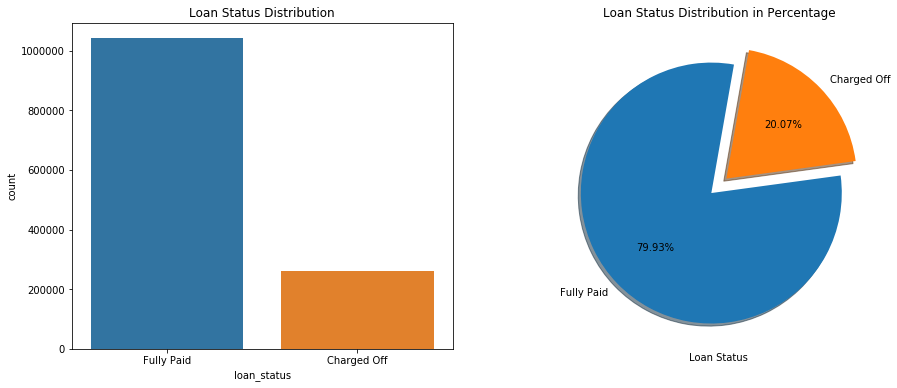

In [21]:
#Distribution of loan status 
loan_status = [(df1['loan_status'] == 'Fully Paid').sum(), (df1['loan_status'] == 'Charged Off').sum()]
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1, 2, 1)
sns.countplot(df1['loan_status'])
ax1 = plt.title('Loan Status Distribution')

ax2 = plt.subplot(1, 2, 2)
ax2 = plt.pie(loan_status, labels = ('Fully Paid', 'Charged Off'), 
        explode = (0.08, 0.08), shadow=True,startangle = 80, autopct='%1.2f%%')
ax2 = plt.title('Loan Status Distribution in Percentage')
ax2 = plt.xlabel('Loan Status')

We can see that nearly 80% of loans are good loans and 20% are bad loans. This is an imbalanced class case that we will handle it later for modeling so it's not biased.

#### 1.2 Term

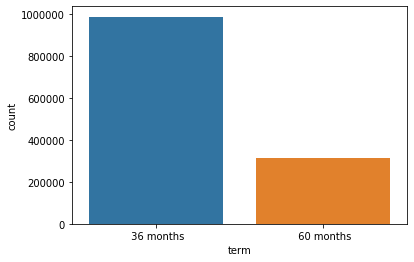

In [22]:
#Distribution of term
sns.countplot(df1['term'])
plt.show()

Loans in term of 36 months is about 3 times of loans in term of 60 months.

#### 1.3 Grade

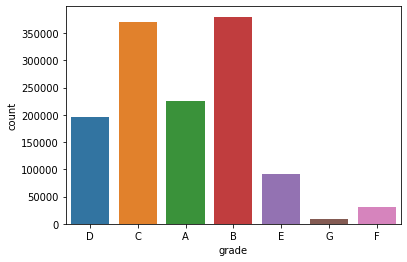

In [23]:
#Distribution of grade
sns.countplot(df1['grade'])
plt.show()

Most of the loans are in grade of B and C, followed with grade A, D and E. Grade F and G are not significant.

#### 1.4 Subgrade

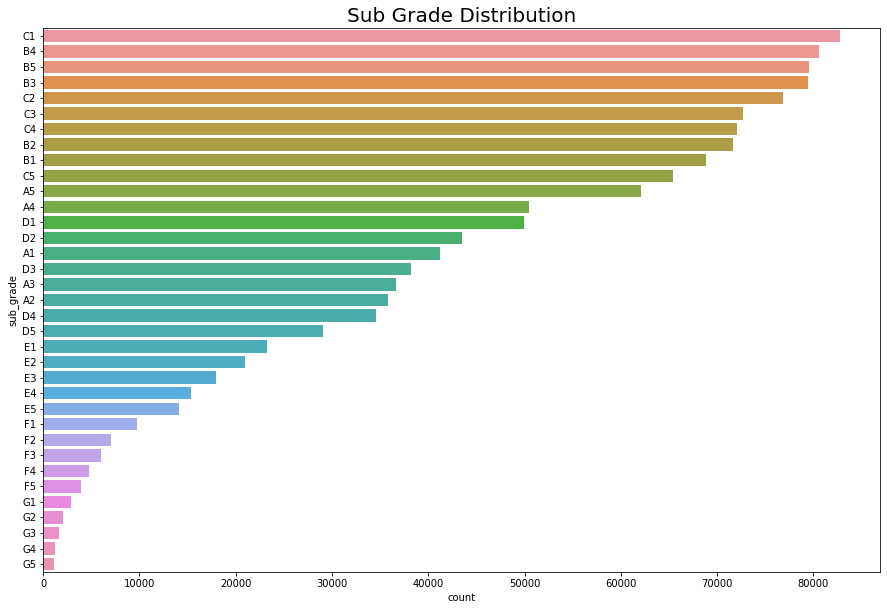

In [24]:
#Distribution of sub_grade
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(y=df1['sub_grade'], order = df1['sub_grade'].value_counts().index)
plt.title('Sub Grade Distribution', fontsize=20)
plt.show()

Furthermore, B1-B5, C1-C5, and A5 are on the top of the list.

#### 1.5 Purpose

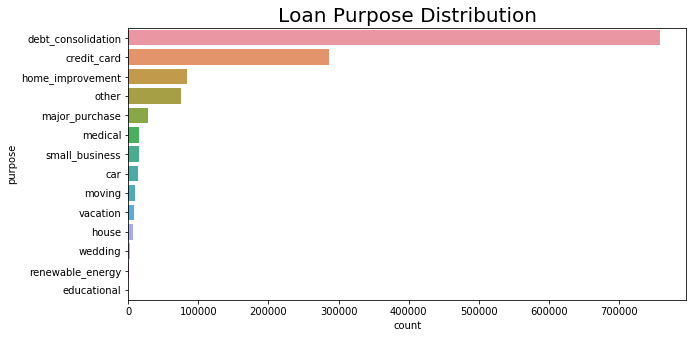

In [25]:
#Distribution of loan purpose
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y=df1['purpose'], order = df1['purpose'].value_counts().index)
plt.title('Loan Purpose Distribution', fontsize=20)
plt.show()

The most common reason for a loan request is debt consolidation, followed by credit card and home improvement. 

#### 1.6 Employment Length

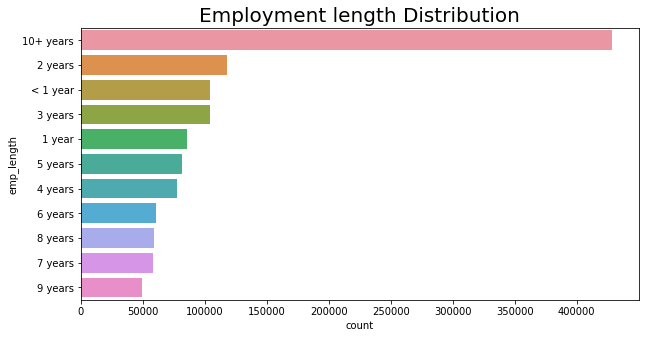

In [26]:
#Distribution of emp_length
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(y=df1['emp_length'], order = df1['emp_length'].value_counts().index)
plt.title('Employment length Distribution', fontsize=20)
plt.show()

Majority of borrowers have an employment history of 10 years and longer. Followed by short employment history of 0-3 years. 

#### 1.7 Home Ownership

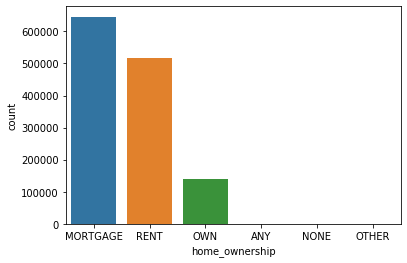

In [27]:
#Distribution of home ownership
sns.countplot(df1['home_ownership'])
plt.show()

Most of the borrowers have mortgage or rent.

#### 1.8 Geographics

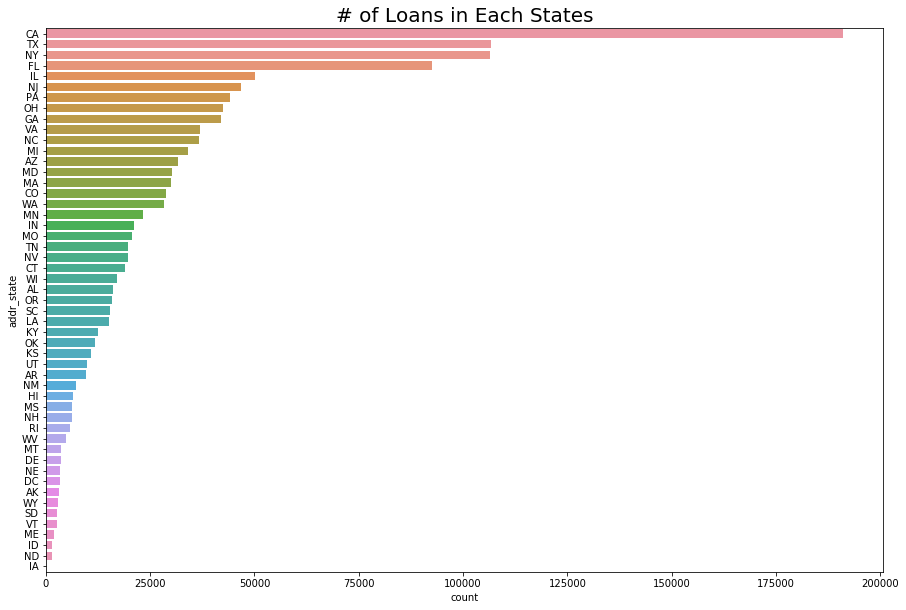

In [28]:
#Distribution of loans issued in each state
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(y=df1['addr_state'], order = df1['addr_state'].value_counts().index)
plt.title('# of Loans in Each States', fontsize=20)
plt.show()

California has the highest amount of loans issued, followed by Texas, New York, and Florida.

#### 1.9 Interest Rate

In [29]:
df1.int_rate.describe()

count    1.303607e+06
mean     1.325722e+01
std      4.760544e+00
min      5.310000e+00
25%      9.750000e+00
50%      1.274000e+01
75%      1.599000e+01
max      3.099000e+01
Name: int_rate, dtype: float64

The interst rate ranges from 5.31% to 30.99%, with an median of 12.74%.

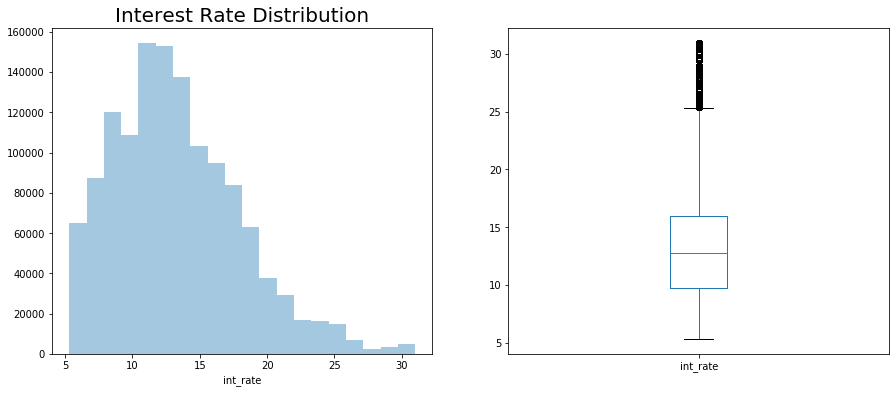

In [30]:
#Histogram of interest rate
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1, 2, 1)
sns.distplot(df1['int_rate'], bins=20, kde=False)
ax1 = plt.title('Interest Rate Distribution', fontsize=20)

#Boxplot of interest rate
ax2 = plt.subplot(1, 2, 2)
df1.int_rate.plot(kind='box')

The distribution of interest rate is slightly skewed to the right. There are outliers at the higher end.

#### 1.10 Loan Amount

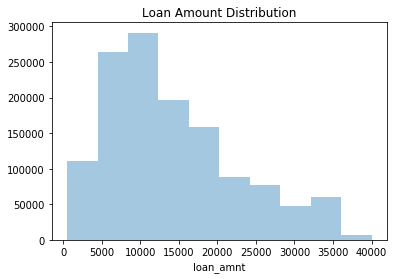

In [31]:
#Distribution of loan amount 
sns.distplot(df1['loan_amnt'],bins=10,kde=False)
plt.title('Loan Amount Distribution')
plt.show()

The distribution of loan amount is slighly skewed to the right. Most borrowers applied loan of around $10,000.

#### 1.11 Annual Income

In [32]:
df1.annual_inc.describe()

count    1.303607e+06
mean     7.615899e+04
std      7.004890e+04
min      0.000000e+00
25%      4.584000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

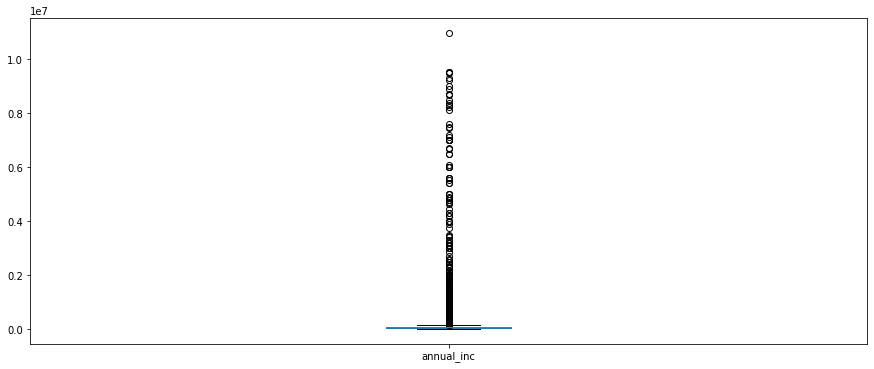

In [33]:
#Create boxplot of annual income
plt.figure(figsize=(15,6))
df1.annual_inc.plot(kind='box')
plt.show()

The boxplot shows large amount of outliers at the higher end. We need to remove outliers to better plot the income distribution. 

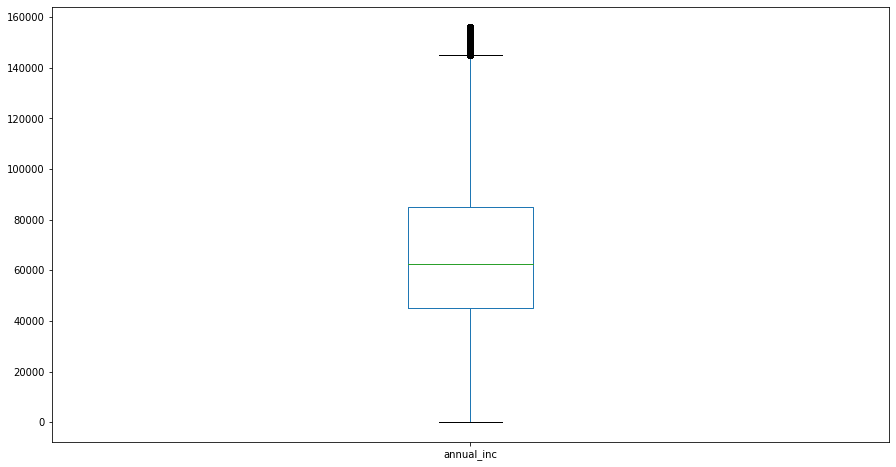

In [34]:
#Create boxplot after removing outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

df1_removed = df1[~((df1['annual_inc'] < (Q1['annual_inc'] - 1.5 * IQR['annual_inc'])) 
                    |(df1['annual_inc'] > (Q3['annual_inc'] + 1.5 * IQR['annual_inc'])))]
plt.figure(figsize=(15,8))
df1_removed.annual_inc.plot(kind='box')
plt.show()

The median income is $65k. Loan is offered to borrowers with very little to zero income.

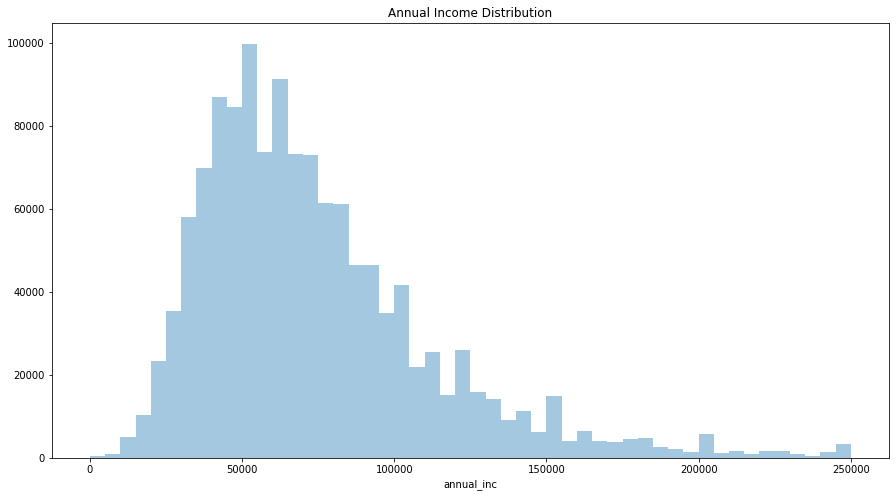

In [35]:
#Histogram of annual income under $250,000
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(df1['annual_inc'][df1['annual_inc']<=250000], kde=False)
plt.title('Annual Income Distribution')
plt.show()

The distribution of annual income is skewed to the right.

#### 1.12 dti - Debt-to-income Ratio

In [36]:
df1.dti.describe()

count    1.303295e+06
mean     1.825875e+01
std      1.093849e+01
min     -1.000000e+00
25%      1.179000e+01
50%      1.761000e+01
75%      2.404000e+01
max      9.990000e+02
Name: dti, dtype: float64

Debt-to-income ratio ranges from -1% to 999%. The median is 17.61%.

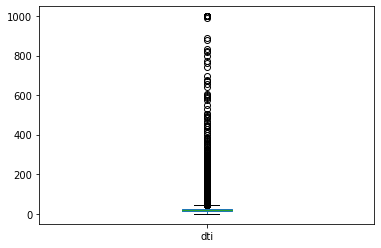

In [37]:
#Create boxplot for dti
df1.dti.plot(kind='box')
plt.show()

dti data has a large amount of outliers that need to be removed.

/Users/host1/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/host1/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


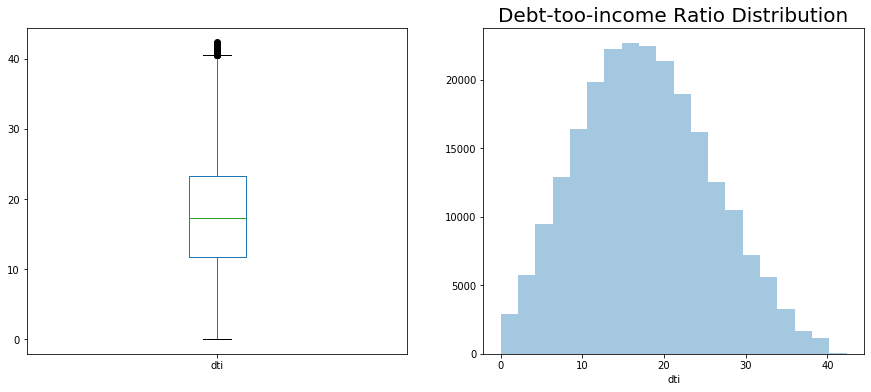

In [38]:
df1_removed = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(15,6))

#Boxplot of dti
ax2 = plt.subplot(1, 2, 1)
df1_removed.dti.plot(kind='box')

#Histogram of dti
ax1 = plt.subplot(1, 2, 2)
sns.distplot(df1_removed['dti'], bins=20, kde=False)
ax1 = plt.title('Debt-too-income Ratio Distribution', fontsize=20)

plt.show()

After removing the outliers, dti is nearly normally distributed, with the figures between 0% and 40%. 

### 2. Bivariate Analysis

A function of plot for key variables versus Loan Status is created in convinience of creating multiple stacked bar plots.

In [39]:
#Create a function of stacked column chart
def stackedbarloanstatus(x):
        
    fig, ax = plt.subplots(1,1, figsize=(15,8))

    charge_off=df1.loc[df1['loan_status']=='Charged Off']
    fully_paid=df1.loc[df1['loan_status']=='Fully Paid']
    newdf = pd.DataFrame({'Charge Off': charge_off[x].value_counts(),
                          'Fully Paid': fully_paid[x].value_counts()})


    status_index = newdf.index.tolist()

    
    bars1 = newdf['Charge Off']
    bars2 = newdf['Fully Paid']

    # Heights of bars1 + bars2
    bars = np.add(newdf['Charge Off'], newdf['Fully Paid']).tolist()

 
    # The position of the bars on the x-axis
    r = np.arange(0, len(bars), 1)
 
    # Names of group and bar width
    names = newdf.index
    barWidth = 1
 
    # Create orange bars
    ax.bar(r, bars1, color='darkorange',edgecolor='white', width=barWidth, label='Charged Off')
    #ax.bar(r, bars2, color='steelblue',bottom=bars1, edgecolor='white', width=barWidth, label='Fully Paid')

    # Create blue bars (middle), on top of the first ones
    ax.bar(r, bars2, color='steelblue',bottom=bars1, edgecolor='white', width=barWidth, label='Fully Paid')
    #ax.bar(r, bars1, color='darkorange',edgecolor='white', width=barWidth, label='Charged Off')

    if x=='purpose':
        rotation=90
    else:
        rotation=0
    # Custom X axis
    plt.xticks(r, names, fontweight='bold', rotation=rotation)
    plt.legend()
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.title("Distribution of Loan Status by " + x, size=16)
    plt.show()

#### 2.1 Term vs Loan Status

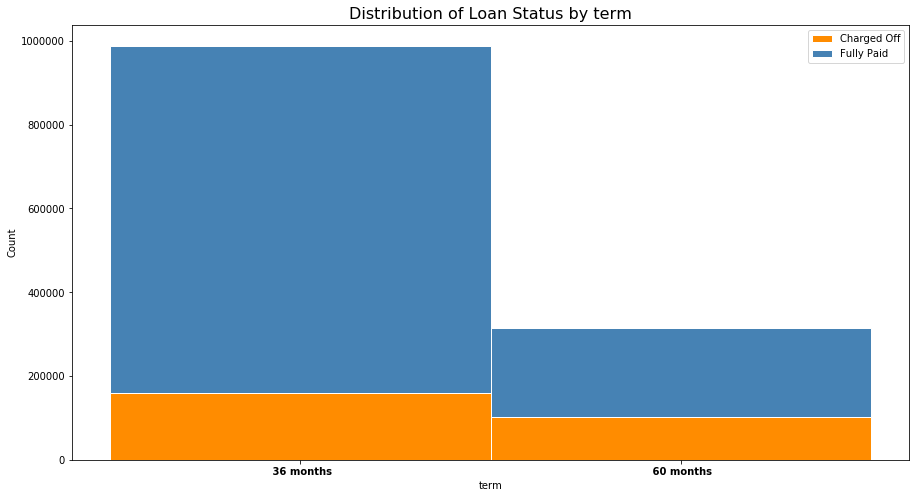

In [40]:
#Term vs good loans and bad loans
stackedbarloanstatus('term')

Proportion of default loans is larger for loans with term of 60 months than 36 months. This means that loans with longer terms are at higher risk of default. 

#### 2.2 Grade vs Loan Status

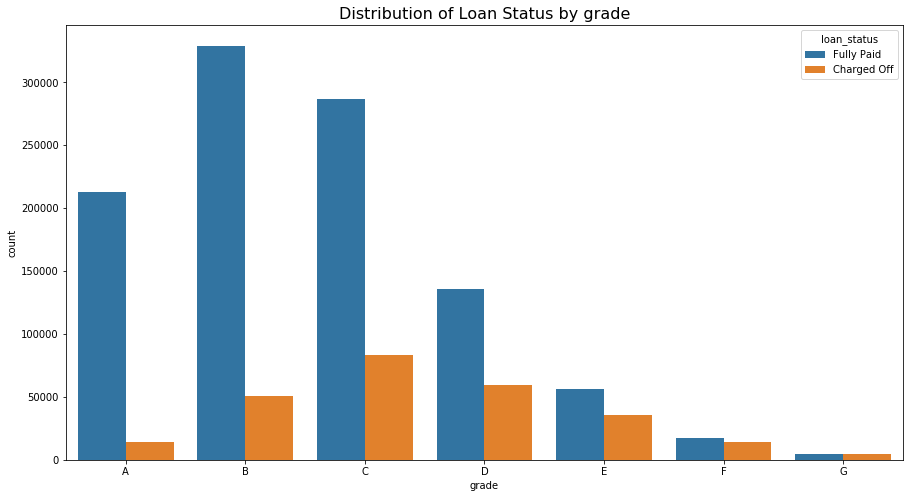

In [64]:
#Grade vs good loans and bad loans
fig = plt.figure(figsize=(15,8))
sns.countplot(x='grade', hue='loan_status', data=df1, order=['A','B','C','D','E','F','G'])
plt.title('Distribution of Loan Status by grade', size=16)
plt.show()

Loans with lower grade after C are at higher risk of default.

#### 2.3 Subgrade vs Loan Status

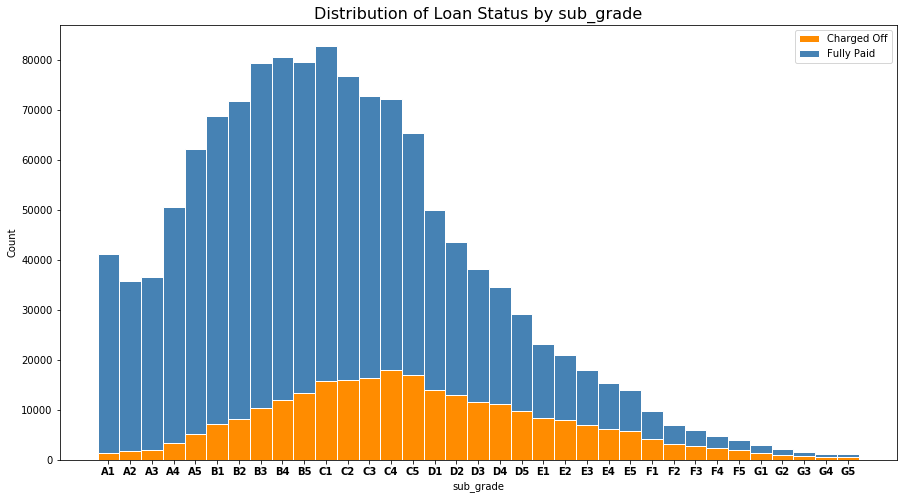

In [42]:
#Subgrade vs good loans and bad loans
stackedbarloanstatus('sub_grade')

Loans with lower grade after C1 are at high risk of default.

#### 2.4 Purpose vs Loan Status

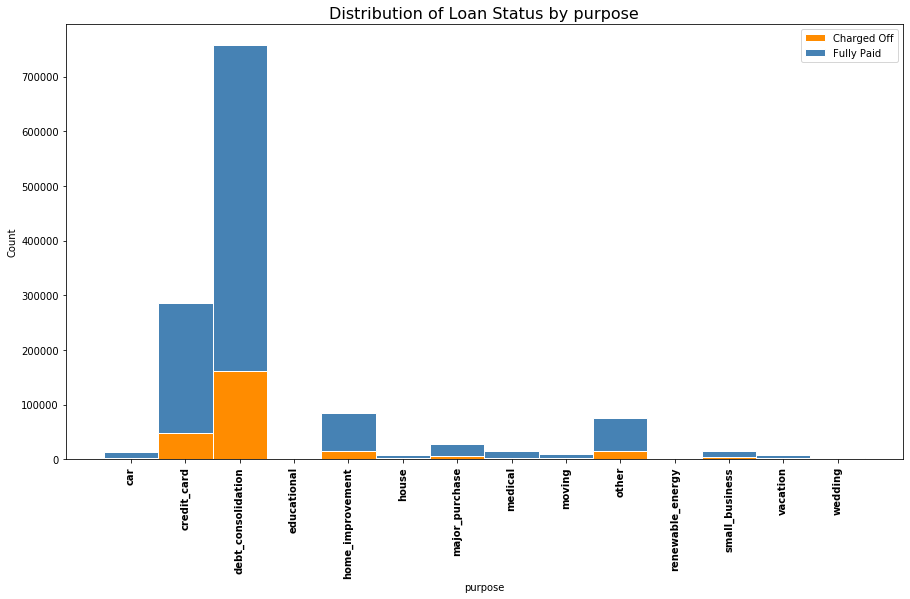

In [43]:
#Purpose vs good loans and bad loans
stackedbarloanstatus('purpose')

Loan for small business has the highest default rate.

#### 2.5 Employment Length vs Loan Status

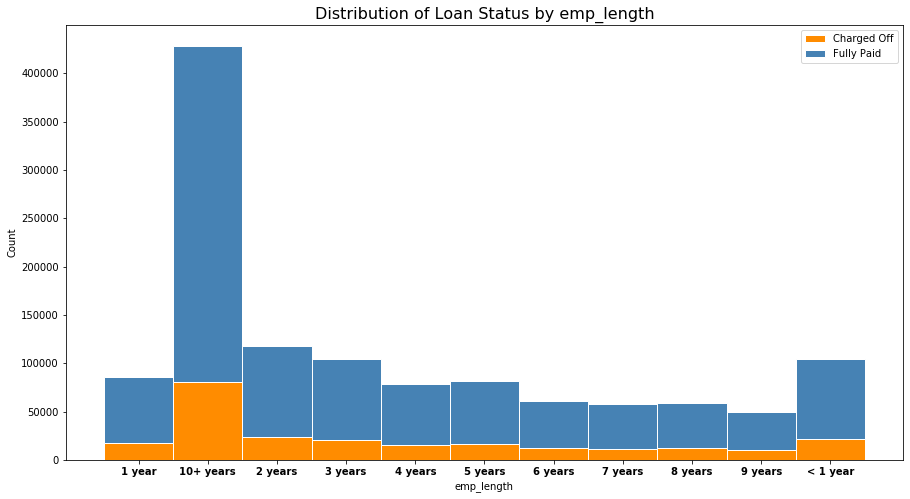

In [44]:
#Employment Length vs good loans and bad loans
stackedbarloanstatus('emp_length')

Borrowers who work more than 10 years seem to be offered the most loans. The reason could be that the majority of borrowers have an employment history of 10 years and longer. We can see from the plot that the percentage of defaulted loan for all employment length are similar. Thus emp_length is not significant in detecting default.

#### 2.6 Home Ownership vs Loan Status

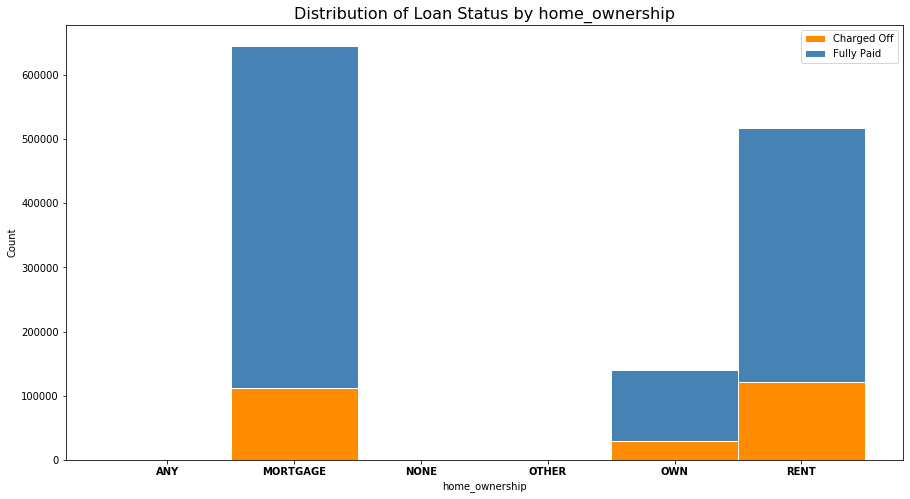

In [45]:
#Home Ownership vs good loans and bad loans
stackedbarloanstatus('home_ownership')

Loans default more in case of Rent, Mortgage, and own among all home ownership. The default rate in mortgage and rent is almost the same.

#### 2.7 State vs Loan Status

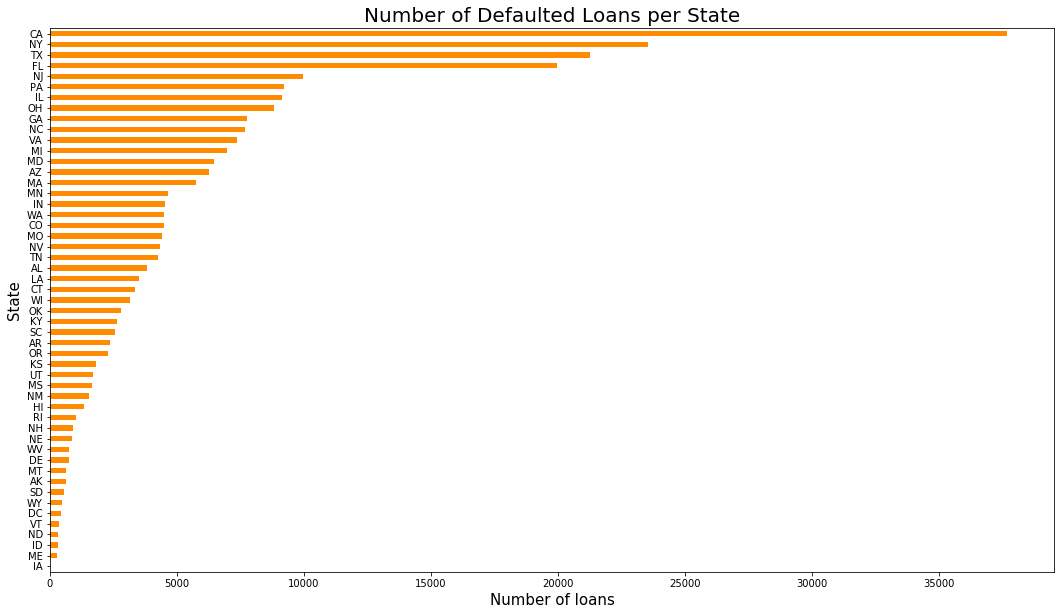

In [46]:
#States that have bad loans
fig = plt.figure(figsize=(18,10))
df1[df1['charge_off']==1].groupby('addr_state')['charge_off'].count().sort_values().plot(kind='barh', color='darkorange')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of Defaulted Loans per State',fontsize=20)
plt.show()

California has the highest amount of defaulted loans, followed by New York, Texas, and Florida.

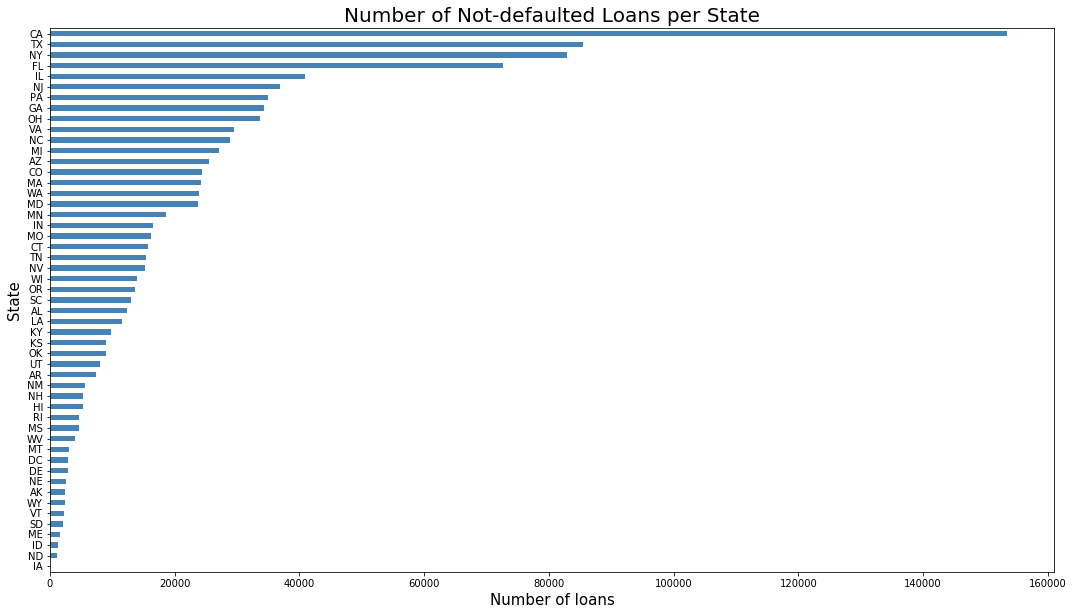

In [47]:
#States that have good loans
fig = plt.figure(figsize=(18,10))
df1[df1['charge_off']==0].groupby('addr_state')['charge_off'].count().sort_values().plot(kind='barh', color='steelblue')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of Not-defaulted Loans per State',fontsize=20)
plt.show()

California has the highest amount of not-defaulted loans, followed by Texas, New York, and Florida.

When comparing the above 2 plots, we can see that the states contains good loans and bad loans are almost in same order. This means that state is not a useful feature of predicting a loan to be defaulted or not.

#### 2.8 Verification Status vs Loan Status

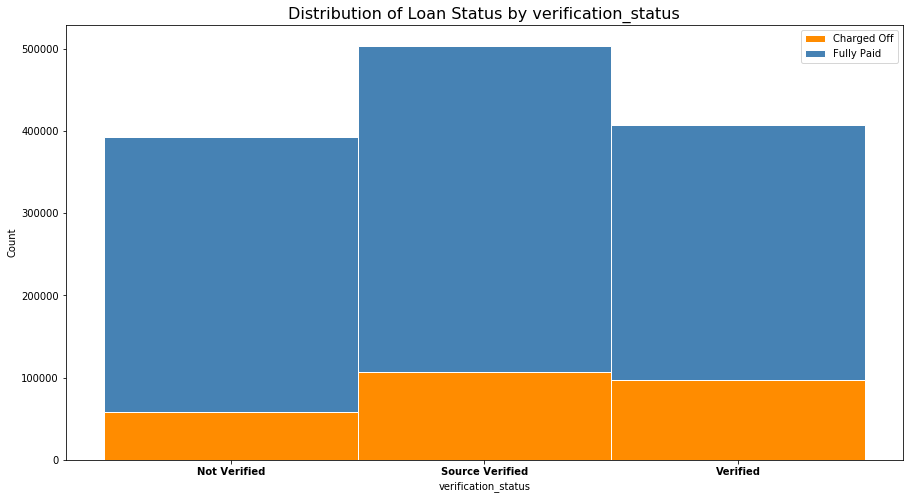

In [48]:
#Verification Status vs good loans and bad loans
stackedbarloanstatus('verification_status')

The default rate in verified category is slightly higher than non-verified categories. 

#### 2.9 Application Type vs Loan Status

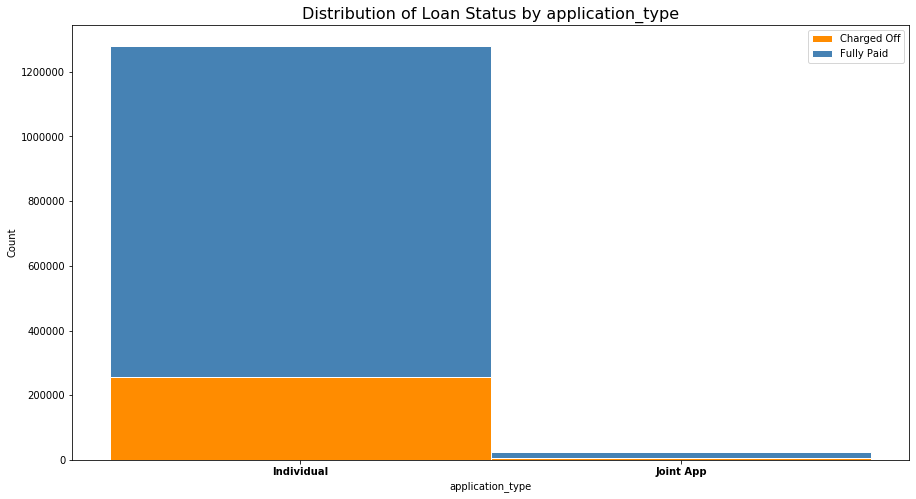

In [49]:
#Application Type vs good loans and bad loans
stackedbarloanstatus('application_type')

The number of joint application is so small that it can be ignored in our analysis.

#### 2.10 Interest Rate vs Loan Status

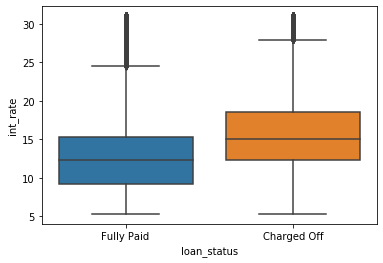

In [50]:
#Interest rate vs good loans and bad loans, respectively
sns.boxplot(data=df1, x='loan_status', y='int_rate')
plt.show()

Defaulted loans have higher interest rate than the non-defaulted loans. This may indicate that loans with higher interest rate tend to default.

#### 2.11 Loan Amount vs Loan Status

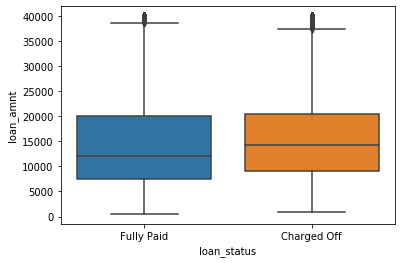

In [51]:
#Loan amount vs good loans and bad loans, respectively
sns.boxplot(data=df1, x='loan_status', y='loan_amnt')
plt.show()

Loans with larger amount tends to have higher risk of default than non-defaulted loans.

#### 2.12 Annual Income vs Loan Status

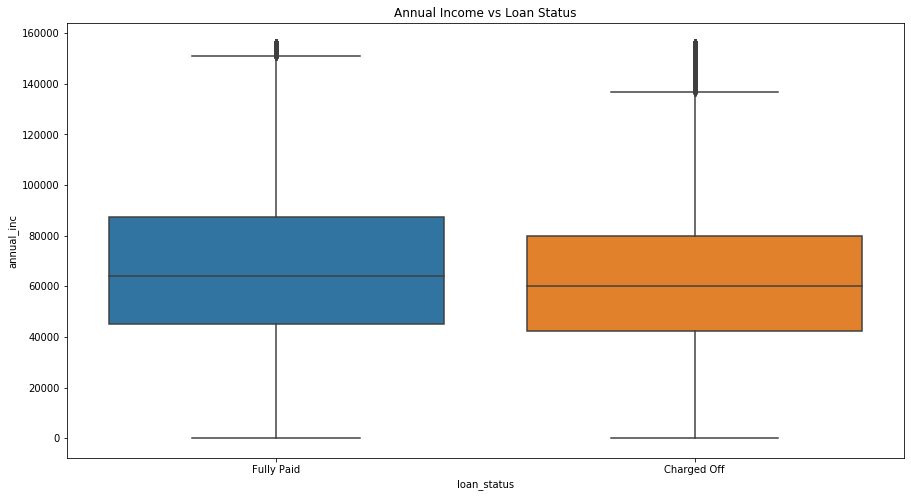

In [52]:
#Annual income without outliers vs good loans and bad loans, respectively
df1_removed = df1[~((df1.annual_inc < (Q1.annual_inc - 1.5 * IQR.annual_inc)) |(df1.annual_inc > (Q3.annual_inc + 1.5 * IQR.annual_inc)))]

fig, ax = plt.subplots(figsize=(15,8))
#df1_removed.annual_inc.plot(kind='box')
sns.boxplot(data=df1_removed, x='loan_status', y='annual_inc')
plt.title('Annual Income vs Loan Status')
plt.show()

Borrowers who pay back loans have higher income than borrower who default loans. Howerver, the income difference between the two group is not very significant. 

#### 2.13 dti vs Loan Status

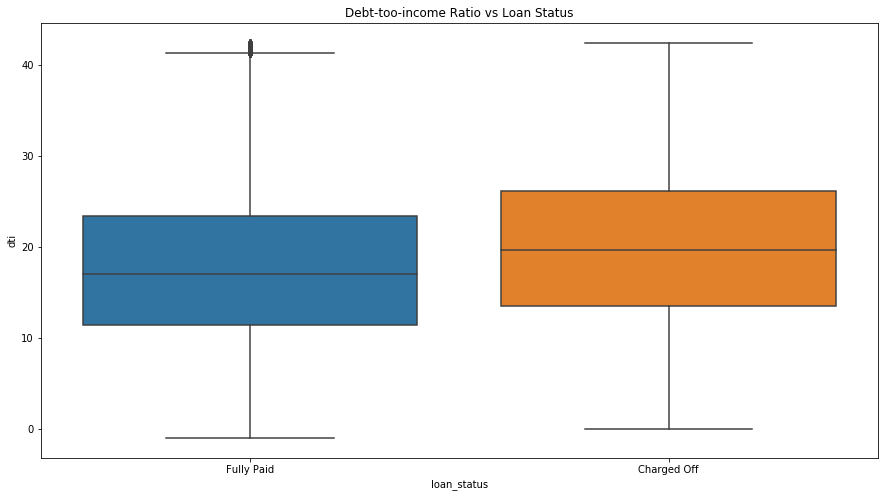

In [53]:
#dti without outliers vs good loans and bad loans, respectively
df1_removed = df1[~((df1.dti < (Q1.dti - 1.5 * IQR.dti)) |(df1.dti > (Q3.dti + 1.5 * IQR.dti)))]

fig, ax = plt.subplots(figsize=(15,8))
#df1_removed.annual_inc.plot(kind='box')
sns.boxplot(data=df1_removed, x='loan_status', y='dti')
plt.title('Debt-too-income Ratio vs Loan Status')
plt.show()

Borrowers who default loans have higher dti than borrower who pay back loans.

#### 2.16 Interest Rate vs Grade

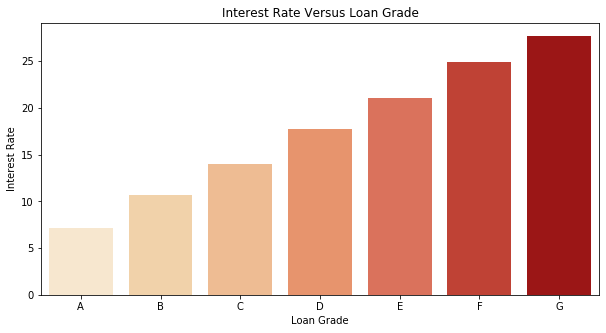

In [54]:
#Interest rate vs grade
plt.figure(figsize=(10,5))
plot_data = df1.groupby('grade')['int_rate'].mean()
ax = sns.barplot(x=plot_data.index,y=plot_data.values,palette='OrRd')
ax = plt.xlabel('Loan Grade')
ax = plt.ylabel('Interest Rate')
ax = plt.title('Interest Rate Versus Loan Grade')

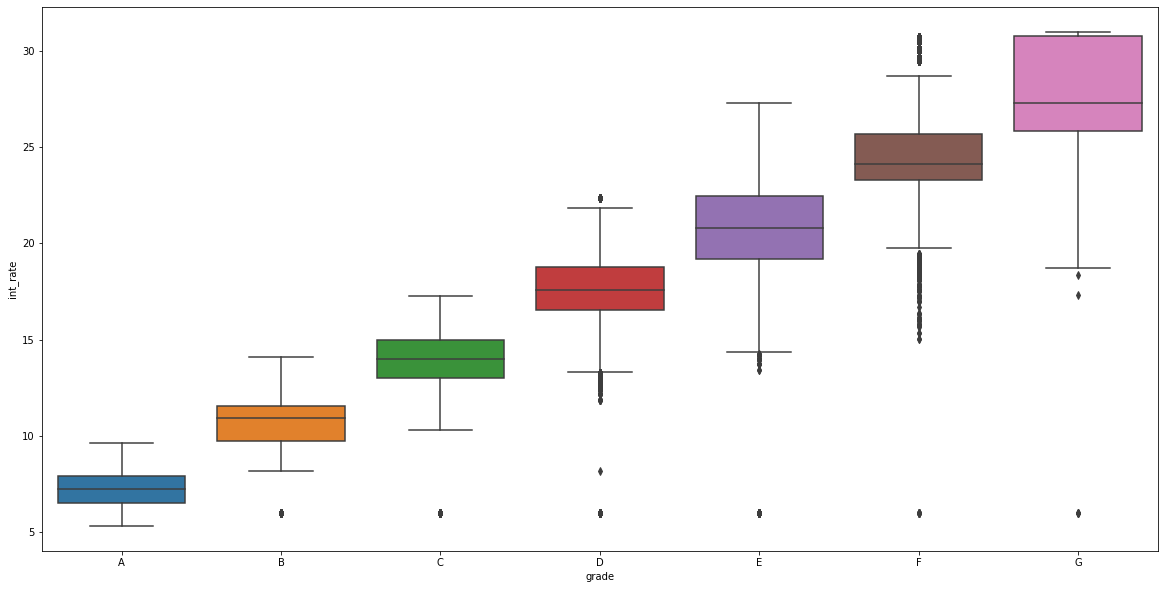

In [65]:
#Interest rate vs grade
plt.figure(figsize=(20, 10))
sns.boxplot(x='grade', y='int_rate', data=df1, order = ['A','B','C','D','E','F','G'])
plt.show()

Interest rate is higher when the grade is lower.

#### 2.17 Loan Amount vs Purpose

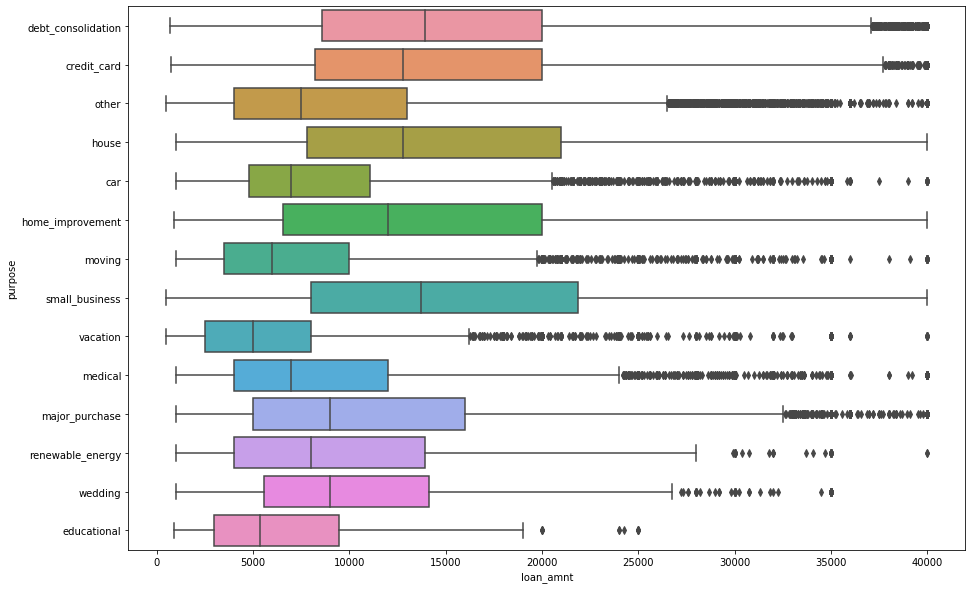

In [55]:
#Loan amount vs purpose
plt.figure(figsize=(15,10))
sns.boxplot(data=df1, x='loan_amnt', y='purpose')
plt.show()

The top purposes with the highest loan amount are small business, House, debt consolidation, credit card, and home improvement.

## III. Data Cleaning

### 1. Working on a copy of dataframe

In [56]:
df2 = df1.copy()
df2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,charge_off
100,30000,30000,30000.0,36 months,22.35,1151.16,D,D5,5 years,MORTGAGE,...,2.0,89.5,33.3,1.0,0.0,527120.0,98453.0,28600.0,101984.0,0
152,40000,40000,40000.0,60 months,16.14,975.71,C,C4,< 1 year,MORTGAGE,...,4.0,100.0,42.9,0.0,0.0,344802.0,161720.0,45700.0,167965.0,0
170,20000,20000,20000.0,36 months,7.56,622.68,A,A3,10+ years,MORTGAGE,...,1.0,94.7,20.0,0.0,0.0,622183.0,71569.0,85100.0,74833.0,0
186,4500,4500,4500.0,36 months,11.31,147.99,B,B3,10+ years,RENT,...,4.0,91.7,0.0,0.0,0.0,53795.0,29137.0,15100.0,24595.0,0
215,8425,8425,8425.0,36 months,27.27,345.18,E,E5,3 years,MORTGAGE,...,2.0,100.0,50.0,0.0,0.0,768304.0,189194.0,45800.0,189054.0,0


### 2. Clean data for modeling

#### 2.1 Create dummy variables for categorical variables

In [57]:
#Create dummy variables 
df2_dummy = pd.get_dummies(data=df1, columns=['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'application_type'])
df2_dummy.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,addr_state,dti,delinq_2yrs,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Individual,application_type_Joint App
100,30000,30000,30000.0,22.35,1151.16,100000.0,Fully Paid,CA,30.46,0.0,...,0,0,0,0,0,0,0,0,0,1
152,40000,40000,40000.0,16.14,975.71,45000.0,Fully Paid,OH,50.53,0.0,...,0,0,0,0,0,0,0,0,0,1
170,20000,20000,20000.0,7.56,622.68,100000.0,Fully Paid,WA,18.92,0.0,...,0,0,0,0,0,0,0,0,0,1
186,4500,4500,4500.0,11.31,147.99,38500.0,Fully Paid,TX,4.64,0.0,...,0,0,0,0,0,0,0,0,1,0
215,8425,8425,8425.0,27.27,345.18,450000.0,Fully Paid,MA,12.37,0.0,...,0,0,0,0,0,0,0,0,0,1


#### 2.2 Prepare dataframe for modeling

In [58]:
#Select data for modeling
variable_selected = ['charge_off',
 'int_rate',
 'term_ 60 months',
 'grade_E',
 'grade_D',
 'acc_open_past_24mths',
 'grade_F',
 'dti',
 'home_ownership_RENT',
 'loan_amnt',
 'verification_status_Verified',
 'grade_G',
 'sub_grade_E5',
 'sub_grade_E2',
 'sub_grade_E3',
 'sub_grade_E4',
 'sub_grade_E1',
 'installment',
 'sub_grade_D4',
 'sub_grade_D5',
 'mths_since_recent_bc',
 'delinq_2yrs',
 'inq_last_6mths']

#Preparing final dataframe
df_final = df2_dummy[variable_selected].copy()

#### 2.3 Fill missing data

In [59]:
#Fill with median values
df_final['acc_open_past_24mths'].fillna(df_final['acc_open_past_24mths'].median(),inplace=True)

#Fill with maximum values
df_final['mths_since_recent_bc'].fillna(df_final['mths_since_recent_bc'].max(),inplace=True)

#Fill with 0
list_0 = ['dti', 'inq_last_6mths']
for column in list_0:
    df_final[column].fillna(0, inplace=True)
    
#Check missing values 
df_final.isnull().sum()

charge_off                      0
int_rate                        0
term_ 60 months                 0
grade_E                         0
grade_D                         0
acc_open_past_24mths            0
grade_F                         0
dti                             0
home_ownership_RENT             0
loan_amnt                       0
verification_status_Verified    0
grade_G                         0
sub_grade_E5                    0
sub_grade_E2                    0
sub_grade_E3                    0
sub_grade_E4                    0
sub_grade_E1                    0
installment                     0
sub_grade_D4                    0
sub_grade_D5                    0
mths_since_recent_bc            0
delinq_2yrs                     0
inq_last_6mths                  0
dtype: int64

Now the data is ready for modeling.

## IV Modeling

In [60]:
X = df_final.drop('charge_off', axis=1)
y = df_final['charge_off']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

sc = MinMaxScaler()
clf = LogisticRegression(penalty='l1',C=0.01, solver='liblinear',random_state=0)

pipe_lr = Pipeline([('scaler',sc),('clf', clf)])

pipe_lr.fit(X_train, y_train)

pipe_lr.score(X_test, y_test)

0.800323716448938

The data is split into training data and testing data, with the test size of 0.2. A Minimum Maximum Scaler is used to preprocess the data. Logistic Regression model is used here with Pipeline. After fitting the model, an accuracy score of 0.80 is obtained.